# Mask R-CNN demo

This notebook illustrates one possible way of using `maskrcnn_benchmark` for computing predictions on images from an arbitrary URL.

Let's start with a few standard imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np

In [2]:
# this makes our figures bigger
pylab.rcParams['figure.figsize'] = 20, 12

Those are the relevant imports for the detection model

In [3]:
from maskrcnn_benchmark.config import cfg
from predictor import COCODemo

We provide a helper class `COCODemo`, which loads a model from the config file, and performs pre-processing, model prediction and post-processing for us.

We can configure several model options by overriding the config options.
In here, we make the model run on the CPU

In [14]:
config_file = "../configs/caffe2/e2e_mask_rcnn_R_50_FPN_1x_caffe2.yaml"

# update the config options with the config file
cfg.merge_from_file(config_file)
# manual override some options
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

Now we create the `COCODemo` object. It contains a few extra options for conveniency, such as the confidence threshold for detections to be shown.

In [15]:
coco_demo = COCODemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
)

predictor.py: init
build_detection_model


Let's define a few helper functions for loading images from a URL

In [16]:
def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")

Let's now load an image from the COCO dataset. It's reference is in the comment

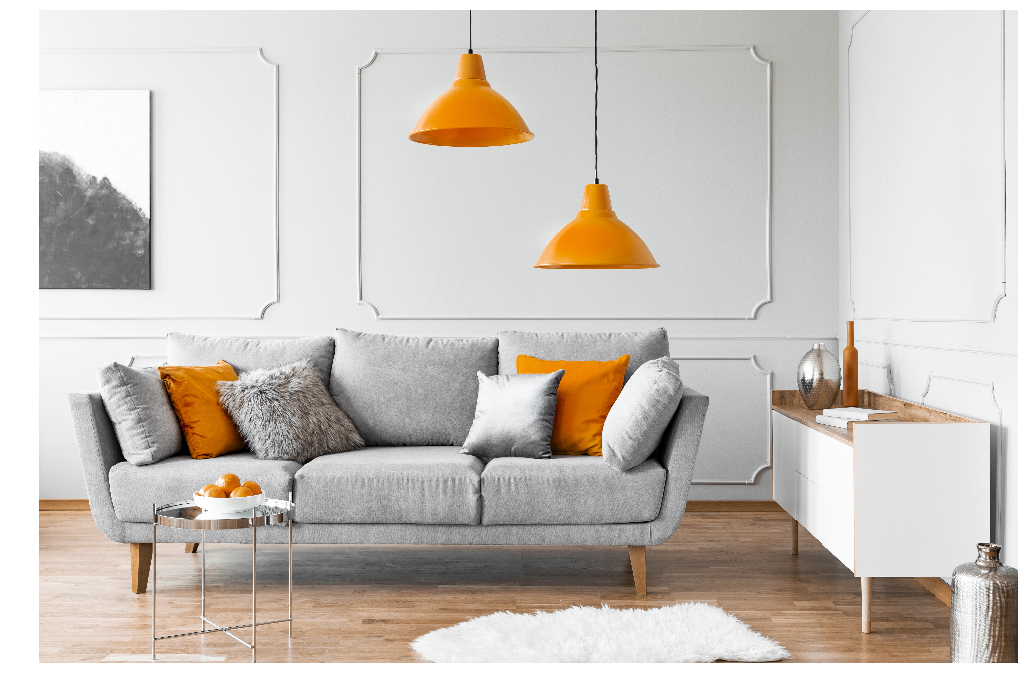

In [17]:
# from http://cocodataset.org/#explore?id=345434
image = load("https://img.huffingtonpost.com/asset/5c7435f220000096036eabba.jpeg")
imshow(image)

### Computing the predictions

We provide a `run_on_opencv_image` function, which takes an image as it was loaded by OpenCV (in `BGR` format), and computes the predictions on them, returning an image with the predictions overlayed on the image.

torch.Size([1, 256, 200, 304])
torch.Size([1, 256, 100, 152])
torch.Size([1, 256, 50, 76])
torch.Size([1, 256, 25, 38])
torch.Size([1, 256, 13, 19])


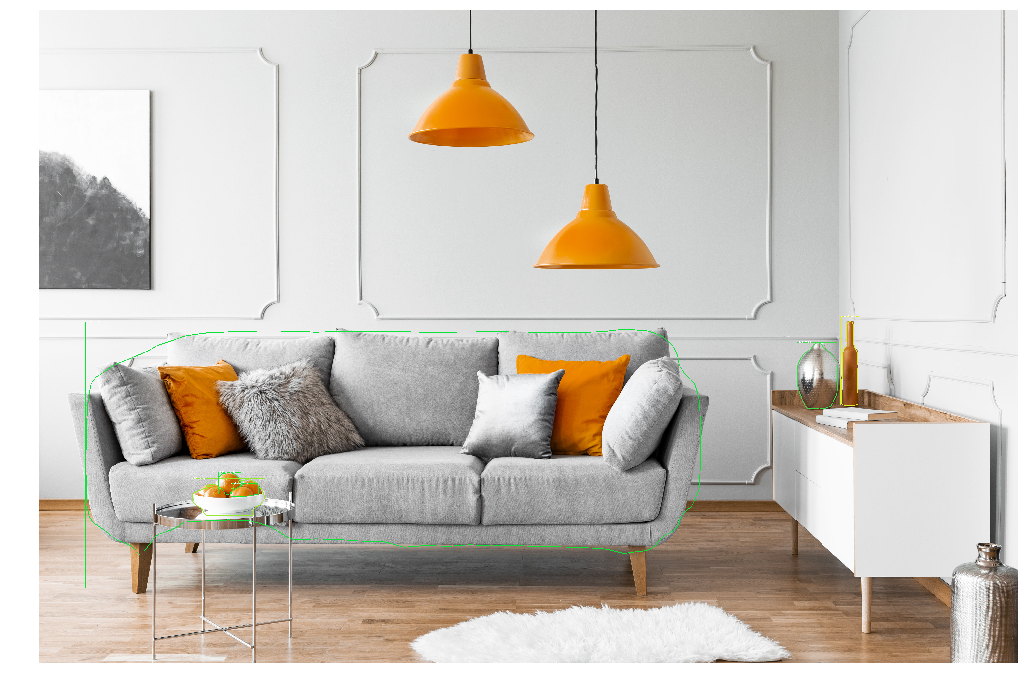

In [18]:
# compute predictions
predictions, features = coco_demo.run_on_opencv_image(image)
imshow(predictions)
for feature in features:
    print(feature.size())

In [9]:
import torch.nn as nn
import torch

features_upsampled = []
for i in range(0, 5):
    f = nn.Upsample(scale_factor=2**i, mode='nearest')
    print(features[i].size())
    print(features)
    upsampled = f(features[i])
    print(upsampled.size())
    features_upsampled.append(f(features[i]))



torch.Size([1, 256, 200, 304])
(tensor([[[[ 3.1099,  1.9541,  2.1808,  ...,  1.8774,  1.1994,  0.4766],
          [ 3.5842,  2.6969,  2.5297,  ...,  2.7248,  1.0857,  0.2040],
          [ 3.1119,  2.8612,  2.4136,  ...,  2.6928,  1.3092,  0.6061],
          ...,
          [ 2.1001,  1.5202,  1.1260,  ...,  0.6984, -0.3045, -0.1477],
          [ 2.3953,  1.6982,  1.2855,  ...,  0.2081, -0.4299, -0.2283],
          [ 1.1948,  0.3107, -0.0657,  ..., -0.4971, -1.4501, -1.1837]],

         [[-1.8030, -0.1123,  0.3172,  ...,  0.2743,  0.7272,  0.7303],
          [-3.0306, -1.2069,  0.2900,  ..., -1.1363,  0.1114,  0.4890],
          [-2.7459, -1.7318, -0.3654,  ..., -0.6492,  0.1625,  0.5151],
          ...,
          [-2.1547, -0.6253,  0.5782,  ...,  0.1843,  0.9327,  1.2180],
          [-2.0924, -0.3124,  0.8785,  ...,  0.2159,  1.2416,  1.5115],
          [-1.3422, -0.0071,  0.9652,  ..., -0.8234,  0.1367,  0.6823]],

         [[ 1.0873,  0.8055,  0.6164,  ...,  1.3973,  0.2309,  0.4703]

torch.Size([1, 256, 100, 152])
(tensor([[[[ 3.1099,  1.9541,  2.1808,  ...,  1.8774,  1.1994,  0.4766],
          [ 3.5842,  2.6969,  2.5297,  ...,  2.7248,  1.0857,  0.2040],
          [ 3.1119,  2.8612,  2.4136,  ...,  2.6928,  1.3092,  0.6061],
          ...,
          [ 2.1001,  1.5202,  1.1260,  ...,  0.6984, -0.3045, -0.1477],
          [ 2.3953,  1.6982,  1.2855,  ...,  0.2081, -0.4299, -0.2283],
          [ 1.1948,  0.3107, -0.0657,  ..., -0.4971, -1.4501, -1.1837]],

         [[-1.8030, -0.1123,  0.3172,  ...,  0.2743,  0.7272,  0.7303],
          [-3.0306, -1.2069,  0.2900,  ..., -1.1363,  0.1114,  0.4890],
          [-2.7459, -1.7318, -0.3654,  ..., -0.6492,  0.1625,  0.5151],
          ...,
          [-2.1547, -0.6253,  0.5782,  ...,  0.1843,  0.9327,  1.2180],
          [-2.0924, -0.3124,  0.8785,  ...,  0.2159,  1.2416,  1.5115],
          [-1.3422, -0.0071,  0.9652,  ..., -0.8234,  0.1367,  0.6823]],

         [[ 1.0873,  0.8055,  0.6164,  ...,  1.3973,  0.2309,  0.4703]

(tensor([[[[ 3.1099,  1.9541,  2.1808,  ...,  1.8774,  1.1994,  0.4766],
          [ 3.5842,  2.6969,  2.5297,  ...,  2.7248,  1.0857,  0.2040],
          [ 3.1119,  2.8612,  2.4136,  ...,  2.6928,  1.3092,  0.6061],
          ...,
          [ 2.1001,  1.5202,  1.1260,  ...,  0.6984, -0.3045, -0.1477],
          [ 2.3953,  1.6982,  1.2855,  ...,  0.2081, -0.4299, -0.2283],
          [ 1.1948,  0.3107, -0.0657,  ..., -0.4971, -1.4501, -1.1837]],

         [[-1.8030, -0.1123,  0.3172,  ...,  0.2743,  0.7272,  0.7303],
          [-3.0306, -1.2069,  0.2900,  ..., -1.1363,  0.1114,  0.4890],
          [-2.7459, -1.7318, -0.3654,  ..., -0.6492,  0.1625,  0.5151],
          ...,
          [-2.1547, -0.6253,  0.5782,  ...,  0.1843,  0.9327,  1.2180],
          [-2.0924, -0.3124,  0.8785,  ...,  0.2159,  1.2416,  1.5115],
          [-1.3422, -0.0071,  0.9652,  ..., -0.8234,  0.1367,  0.6823]],

         [[ 1.0873,  0.8055,  0.6164,  ...,  1.3973,  0.2309,  0.4703],
          [ 2.0781,  0.8416, 

torch.Size([1, 256, 200, 304])
torch.Size([1, 256, 13, 19])
(tensor([[[[ 3.1099,  1.9541,  2.1808,  ...,  1.8774,  1.1994,  0.4766],
          [ 3.5842,  2.6969,  2.5297,  ...,  2.7248,  1.0857,  0.2040],
          [ 3.1119,  2.8612,  2.4136,  ...,  2.6928,  1.3092,  0.6061],
          ...,
          [ 2.1001,  1.5202,  1.1260,  ...,  0.6984, -0.3045, -0.1477],
          [ 2.3953,  1.6982,  1.2855,  ...,  0.2081, -0.4299, -0.2283],
          [ 1.1948,  0.3107, -0.0657,  ..., -0.4971, -1.4501, -1.1837]],

         [[-1.8030, -0.1123,  0.3172,  ...,  0.2743,  0.7272,  0.7303],
          [-3.0306, -1.2069,  0.2900,  ..., -1.1363,  0.1114,  0.4890],
          [-2.7459, -1.7318, -0.3654,  ..., -0.6492,  0.1625,  0.5151],
          ...,
          [-2.1547, -0.6253,  0.5782,  ...,  0.1843,  0.9327,  1.2180],
          [-2.0924, -0.3124,  0.8785,  ...,  0.2159,  1.2416,  1.5115],
          [-1.3422, -0.0071,  0.9652,  ..., -0.8234,  0.1367,  0.6823]],

         [[ 1.0873,  0.8055,  0.6164,  ..

torch.Size([1, 256, 208, 304])


In [ ]:
# stacked_features = torch.stack(features_upsampled)
# print(stacked_features.size())

In [ ]:
# set up demo for keypoints
# config_file = "../configs/caffe2/e2e_keypoint_rcnn_R_50_FPN_1x_caffe2.yaml"
# cfg.merge_from_file(config_file)
# cfg.merge_from_list(["MODEL.DEVICE", "cpu"])
# cfg.merge_from_list(["MODEL.MASK_ON", False])

# coco_demo = COCODemo(
#     cfg,
#     min_image_size=800,
#     confidence_threshold=0.7,
# )

In [ ]:
# run demo
# image = load("http://farm9.staticflickr.com/8419/8710147224_ff637cc4fc_z.jpg")
# predictions, features = coco_demo.run_on_opencv_image(image)
# imshow(predictions)

torch.Size([1, 256, 200, 272])
torch.Size([1, 256, 100, 136])
torch.Size([1, 256, 50, 68])
torch.Size([1, 256, 25, 34])
torch.Size([1, 256, 13, 17])
torch.Size([1, 256, 200, 272])
torch.Size([1, 256, 100, 136])
torch.Size([1, 256, 50, 68])
torch.Size([1, 256, 25, 34])
torch.Size([1, 256, 13, 17])


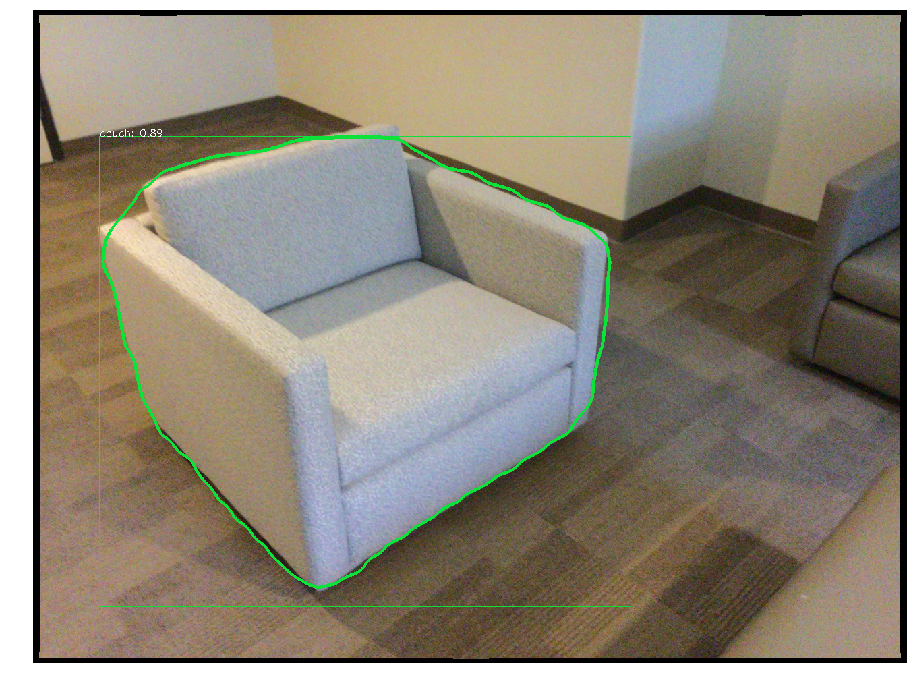

In [11]:
import os
asset_dir = '/home/wzhou14fall/scans/out/'
output_dir = os.path.join(asset_dir, 'features/')

if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
scenes = os.listdir(asset_dir)
# print(scenes)

for scene in scenes:
    if scene.startswith("scene"):
        scene_dir = os.path.join(asset_dir, scene)
        scene_output_dir = os.path.join(output_dir, scene)
        if not os.path.isdir(scene_output_dir):
            os.mkdir(scene_output_dir)
#         print(scene_dir)

        for file in os.listdir(scene_dir):
            if file.endswith(".jpg"):
                img_fn_dir = os.path.join(scene_dir, file)
                pil_image = Image.open(img_fn_dir).convert("RGB")
                image = np.array(pil_image)[:, :, [2, 1, 0]]
                imshow(image)

                predictions, features = coco_demo.run_on_opencv_image(image)
                imshow(predictions)
                for feature in features:
                    print(feature.size())

                torch.save(features, str(scene_output_dir)+'/'+str(file)+'.pt')


                break
    


In [ ]:

img_filenames = os.listdir(img_dir)
# print(files)

for img_fn in img_filenames:
    img_fn_dir = os.path.join(img_dir, img_fn)
    pil_image = Image.open(img_fn_dir).convert("RGB")
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    imshow(image)
    
    predictions, features = coco_demo.run_on_opencv_image(image)
    imshow(predictions)
    for feature in features:
        print(feature.size())
        
    torch.save(features, str(output_dir)+str(img_fn)+'.pt')
        
        
    break





In [ ]:
loaded_features = torch.load(str(output_dir)+str(img_fn)+'.pt')
print(len(loaded_features))
for feature in features:
        print(feature.size())
print(loaded_features)